## How different Loan Characterics effect BorrowerAPR
## by Kafaite Zahra Hussain

## Investigation Overview

Different visualizations using Python's libraries will be created and analysed to see the effect of different features/characteristics on the borrower's APR like ProsperRating, ProsperScore, AvailableBankcardCredit, EmploymentStatus and occupation. 

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan. Unwanted variables were removed outliers were also removed to provide more reliable dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','Occupation','DelinquenciesLast7Years','AvailableBankcardCredit','ProsperScore']
df= df[cols]

# Remove loans with missing borrower APR information
df = df[~df.BorrowerAPR.isna()]

# remove loans with stated monthly income greater than 30k, which are outliers
df = df[df.StatedMonthlyIncome<=30000]

## Distribution of BorrowerAPR value counts

See the distribution of the counts for BorrowerAPR values.

Text(0, 0.5, 'count')

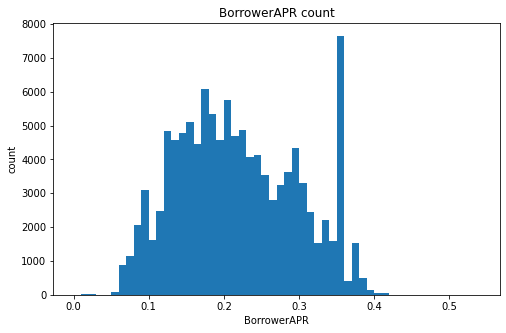

In [4]:
#Plot histogram for BorrowerAPR 
bins = np.arange(0, df.BorrowerAPR.max()+0.03, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR')
plt.ylabel('count')

It is an approximately normal distribution.

Highest count is at the rate 0.35797%, followed by 0.35643%.

## BorrowerAPR vs. ProsperScore

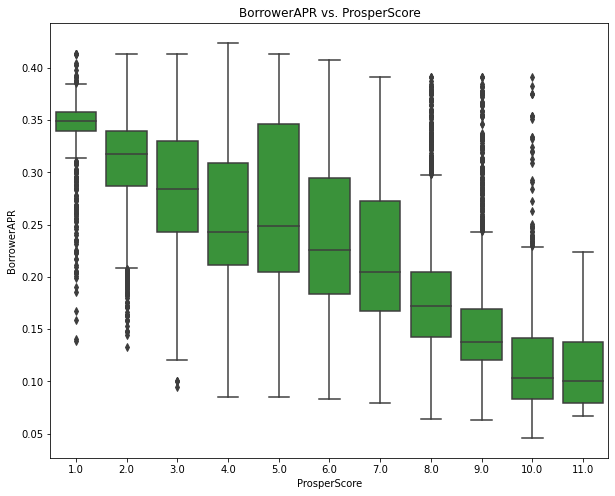

In [5]:
# Boxplot for BorrowerAPR vs. ProsperRating & ProsperScore.
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR',color=sb.color_palette()[2])
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

<function matplotlib.pyplot.show>

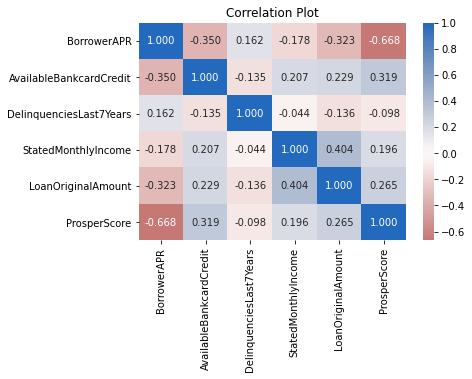

In [6]:
num_vars = ['BorrowerAPR', 'AvailableBankcardCredit', 'DelinquenciesLast7Years', 'StatedMonthlyIncome','LoanOriginalAmount','ProsperScore']
# correlation plot
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show

BorrowerAPR and ProsperScore are the most highly corelated (-0.668) but negatively.

So prosperScore effects the Borrower's APR the most and as the score increases, the rate decreases. 

## BorrowerAPR vs AvailableBankcardCredit & ProsperScore



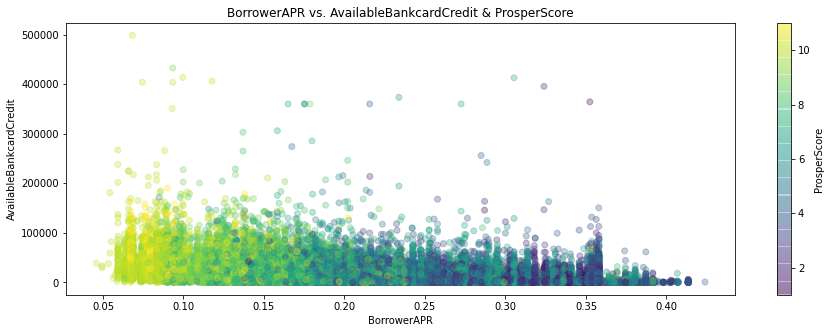

In [7]:
plt.figure(figsize = [15, 5])
plt.scatter(data = df, x = 'BorrowerAPR', y = 'AvailableBankcardCredit', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. AvailableBankcardCredit & ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('AvailableBankcardCredit');

Generally, For higher prosper score, usually the BorrowerAPR and AvailableBankCardCredit both are low

##ProsperRating (Alpha) against BorrowerAPR and Original Loan amount

<Figure size 1080x576 with 0 Axes>

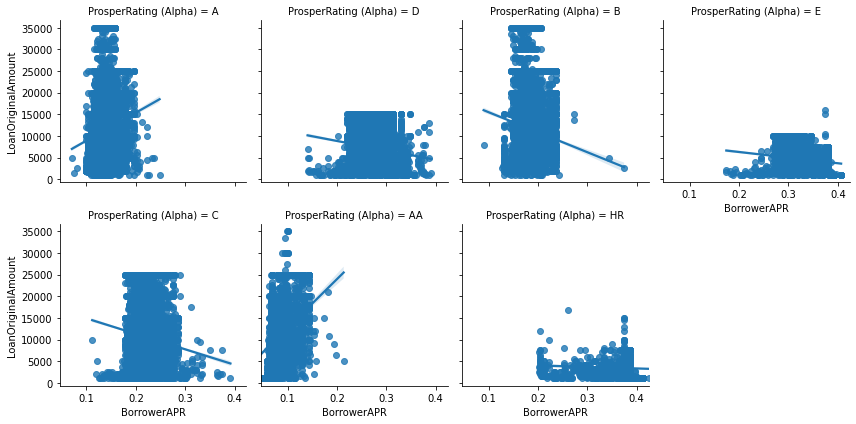

In [8]:
#Faceting to see BorrowerAPR against Original Loan amount for each rating
plt.figure(figsize = [15, 8])
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount')
g.set_xlabels('BorrowerAPR')
g.set_ylabels('LoanOriginalAmount')

The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings get better(from HR to A) that is as people with better ratings tend to borrow more money, increasing APR and hence preventng them from borrowing more and vice versa.

The loan amount increases with better rating.

The borrower APR decreases with better rating.